<a href="https://colab.research.google.com/github/amisihra/ML-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## California Housing Dataset


**How is the total value of homes in a neighborhood affected by different attributes that pertain to the home and the resident?**

In [ ]:
# original dataset
url = 'https://raw.githubusercontent.com/coreyjwade/bca_datasets/master/california_housing.csv'
import pandas as pd
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.shape

(20640, 10)

I'll be using around 1/3 of the data when analyzing and predicting. 

## Column Descriptions


**What will be included:**

MedianAge: Median age of a house within a block; a lower number is a newer building

totalRooms: Total number of rooms within a block

totalBedrooms: Total number of bedrooms within a block

population: Total number of people residing within a block

households: Total number of households, a group of people residing within a home unit, for a block

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

medianHouseValue: Median house value for households within a block (measured in US Dollars)

**What will not be included:**

longitude: A measure of how far west a house is; *predictions will not focus on specific cities*

latitude: A measure of how far north a house is; *predictions will not focus on specific cities*

oceanProximity: Location of the house w.r.t ocean/sea; *categorical*

## Updated Dataset

In [ ]:
housing = df[['housing_median_age', 'total_rooms',	'total_bedrooms',	
                 'population',	'households',	'median_income',	'median_house_value']]
updated_housing = housing.iloc[:6275] # standard number of entries
updated_housing

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
6270,33.0,1493.0,331.0,1571.0,354.0,3.8864,158900.0
6271,27.0,2610.0,846.0,2296.0,750.0,2.2740,150800.0
6272,35.0,1499.0,289.0,1112.0,268.0,3.8300,149000.0
6273,35.0,1375.0,249.0,1015.0,239.0,4.0521,151800.0


In [ ]:
updated_housing.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,6275.000000,6275.000000,6207.000000,6275.000000,6275.000000,6275.000000,6275.000000
mean,31.648127,2408.416574,513.584824,1356.783267,479.458008,3.574406,190960.548207
std,12.555843,1923.546210,388.747686,997.500369,360.686664,1.926671,114766.321894
min,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,22.000000,1360.000000,287.000000,773.500000,272.000000,2.240900,100000.000000
50%,33.000000,1961.000000,416.000000,1120.000000,389.000000,3.160700,164700.000000
75%,41.000000,2866.500000,616.000000,1665.000000,574.000000,4.366050,244250.000000
max,52.000000,32054.000000,5290.000000,15507.000000,5050.000000,15.000100,500001.000000


Even with dropping 2/3rds of the rows, there are still large ranges for every column when looking at the min and max. However when comparing the percentiles with the min and max, you notice skewed data. For example, with total_rooms the max is over 11x larger than the 75th percentile, whereas the min is 680x larger. 

This is seen in total_bedrooms, population, and households which also have large max values.

## Fixing Null Values

In [ ]:
print(updated_housing.isnull().sum())
print(updated_housing.shape)

housing_median_age     0
total_rooms            0
total_bedrooms        68
population             0
households             0
median_income          0
median_house_value     0
dtype: int64
(6275, 7)


Only 68 null values in total, all in the total_bedrooms column.

Considering that's only around 1% of the data and won't have a noticable effect on the dataset, I will remove the null values.

In [ ]:
updated_housing.dropna(axis=0, how='any', inplace=True) # dropping just null values that show up in rows

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
updated_housing.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## Histograms

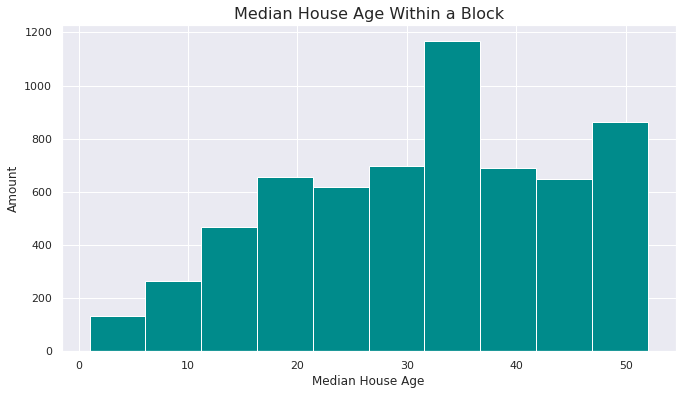

In [ ]:
# import plotting tools
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# sizing/adjusting histogram
plt.figure(figsize=(11, 6))
plt.hist(updated_housing['housing_median_age'], 
         color='darkcyan', alpha=1.0) # plotting

# labeling
plt.xlabel('Median House Age')
plt.ylabel('Amount')

# titling
plt.title('Median House Age Within a Block', 
          size=16) # default 12
# saving
plt.savefig('Median House Age Within a Block', 
            dpi=200)

plt.show()

**Median House Age**

The lower the number, the newer the building, so there's a noticable pattern, older houses from around 35 years are still up. Beyond that, looks like newer buidings are being built, and behind that, older buildings are being torn down (or maybe preserved).

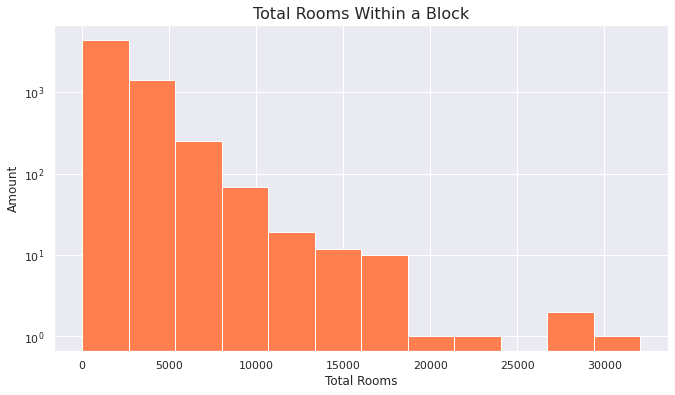

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(11, 6))
plt.hist(updated_housing['total_rooms'], color='coral', 
         alpha=1.0, log=True, bins=12) # plotting

plt.xlabel('Total Rooms')
plt.ylabel('Amount')

plt.title('Total Rooms Within a Block', size=16) # default 12
plt.savefig('Total Rooms Within a Block', dpi=200)

plt.show()

**Total Rooms**

This histogram is skewed to the right, as it's pretty common for buildings to have small amounts of rooms. The numbers that increase towards the right are likely from large estates or even homes renovated into care homes.

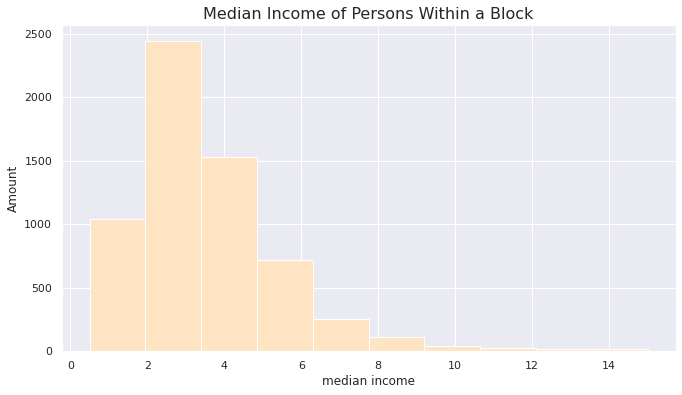

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(11, 6))
plt.hist(updated_housing['median_income'], color='bisque', 
         alpha=1.0) # plotting

plt.xlabel('median income')
plt.ylabel('Amount')

plt.title('Median Income of Persons Within a Block', size=16) # default 12
plt.savefig('Median Income of Persons Within a Block', dpi=200)

plt.show()

**Median Income**

This shows that people living on a block with low income will be surrounded by more people. This is likely due to less square footage per house because it'd be cheaper. Going further to the right, the median income is higher, meaning less people. A smaller population is expected when homes have larger properties.

## Scatterplots

In [ ]:
# finding correlation between columns
updated_housing.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.357942,-0.327875,-0.297649,-0.307428,-0.095686,0.093437
total_rooms,-0.357942,1.000000,0.895052,0.845219,0.900195,0.290731,0.242871
total_bedrooms,-0.327875,0.895052,1.000000,0.892839,0.989739,0.039471,0.162565
population,-0.297649,0.845219,0.892839,1.000000,0.911971,0.033532,0.070794
households,-0.307428,0.900195,0.989739,0.911971,1.000000,0.064601,0.178576
median_income,-0.095686,0.290731,0.039471,0.033532,0.064601,1.000000,0.681595
median_house_value,0.093437,0.242871,0.162565,0.070794,0.178576,0.681595,1.000000


The ones with the highest correlation:

--households with total bedrooms

--total rooms with total bedrooms

Median house value doesn't have a strong correlation with any of columns, although it does have a medium correlation with median income.

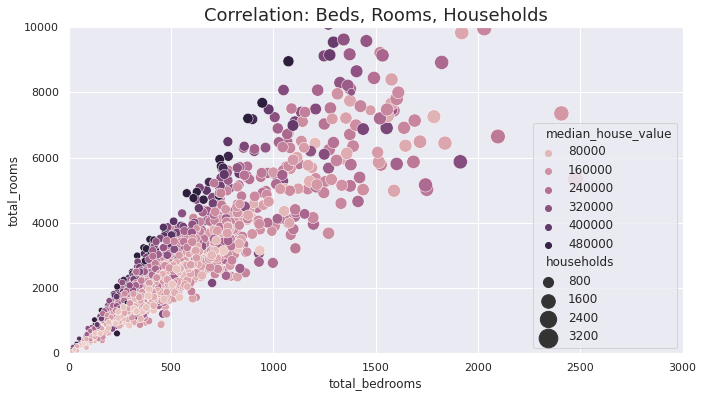

In [ ]:
# shrinking dataset to see a clearer plot
df = updated_housing[:2000]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# sizing plot
plt.figure(figsize=(11, 6))

# adjusting the axes
plt.xlim(0,3000)
plt.ylim(0,10000)

# customizing scatter plot
sns.scatterplot(x = df['total_bedrooms'],
                y = df['total_rooms'], 
                size = df['households'], 
                sizes = (20, 400),
                hue = df['median_house_value'])

# naming plot
plt.title('Correlation: Beds, Rooms, Households', 
          size = 18)
# saving plot
plt.savefig('Correlation: Beds, Rooms, Households', 
            dpi=200)

plt.show()

The correlation between the total bedrooms and rooms is at 0.895052. And including the households, it's a steady increase in size from top to bottom.

Matched with the median house value, the colors don't go completely from bottom to top, the higher values are pushed to one side, showing the ~0.2 correlation stream. 

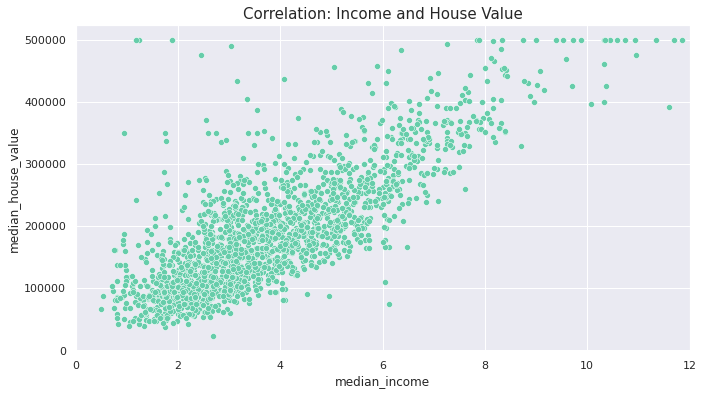

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(11, 6))

plt.xlim(0,12)

sns.scatterplot(x = df['median_income'],
                y = df['median_house_value'],
                color = 'mediumaquamarine')

plt.title('Correlation: Income and House Value', 
          size = 15)
plt.savefig('Correlation: Income and House Value', 
            dpi=200)

plt.show()

The closest correlation to the predicting variable, median house value, while still being low, is median income, with 0.688075.

## Linear Regressions

In [ ]:
X = updated_housing.iloc[:, :-1] # all but last column
y = updated_housing.iloc[:, -1] # the last column

# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# importing LinearRegression algorithm
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5713404057931143

The standard LinearRegression algorithm gave back a score of 0.55. This would result in predictions being accurate only around half the time, so I will be using other algorithms to see if they come up with higher percentages.



In [ ]:
# importing other models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# function to fit and score any regressor
def regression(model):
  model.fit(X_train, y_train)
  print(model.score(X_test, y_test))
  print(model.predict(X[:5]))

In [ ]:
# showing the first 5 entries to match with the predictions
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [ ]:
regression(DecisionTreeRegressor())

0.3768668474913561
[452600. 358500. 352100. 267900. 342200.]


In [ ]:
regression(RandomForestRegressor())

0.6717366848257716
[458109.22 389245.06 390200.28 405595.36 308834.  ]


In [ ]:
regression(XGBRegressor())

[18:05:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6380283760568497
[445871.88 464960.28 397424.25 352664.53 258163.78]


In [ ]:
regression(XGBRFRegressor())

[18:05:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4770719493838403
[405802.44 423183.8  365390.22 335520.84 197371.81]


In [ ]:
regression(KNeighborsRegressor(n_neighbors=5))

0.23470392910733975
[335700.  396020.4 354100.4 161260.  367140.2]


The DecisionTreeRegressor dipped quite a bit, but both XGBRegressor and RandomForestRegressor went up around 10%. RandomForestRegressor is the highest at around 68%.

## Cross Validation

I'll be testing cross validation on the ML algorithms that gave back the highest scores. The purpose being to find out which of them will give back the largest average among multiple data tests.

In [ ]:
# importing cross_val_score
from sklearn.model_selection import cross_val_score

# splitting the data again, but without train/test sets
X = updated_housing.iloc[:, :-1]
y = updated_housing.iloc[:, -1]

In [ ]:
# std is necessary to match with rmse
y.describe()

count      6207.000000
mean     190992.498631
std      114902.969205
min       14999.000000
25%      100000.000000
50%      164600.000000
75%      244350.000000
max      500001.000000
Name: median_house_value, dtype: float64

The standard deviation is 114,902 (min of 164,600). Through cross validation, I'm looking for the smallest rmse value, that's also smaller than the std.

In [ ]:
# function to cross and score any regressor
def cross(model):
  nms_scores = cross_val_score(model, X, y, cv=10, 
                              scoring='neg_mean_squared_error')
  rmse = (-nms_scores)**0.5
  print(rmse)
  print(rmse.mean())

In [ ]:
cross(XGBRegressor(objective='reg:squarederror'))

[ 62314.27670669  46557.26891862  58690.74088806  70136.30184253
  72968.33569708  51426.53907373  86561.12939584  84887.7861237
 104821.46833624  59529.02657211]
69789.28735545915


In [ ]:
cross(RandomForestRegressor())

[71591.93649899 46405.03941321 61079.22320145 68575.43331994
 67263.74292539 51322.26419626 80270.31932842 82316.70813453
 96933.77742727 60130.76865036]
68588.92130958184


## Hypertuning 

In [ ]:
# import KFold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True) # number of folds//shuffles data before splitting

In [ ]:
def cross(model):
  nms_scores = cross_val_score(model, X, y, 
                              scoring='neg_mean_squared_error',
                              cv=kfold)
  rmse = (-nms_scores)**0.5
  print(rmse)
  print(rmse.mean())

In [ ]:
# adding max_depth
cross(XGBRegressor(objective='reg:squarederror', 
                   max_depth=5))

[61667.81233258 67984.29553132 64059.967566   65418.10774216
 59930.41316214 64577.33191032 63238.5242909  65480.61472508
 67421.14701816 64019.54672692]
64379.77610055859


In [ ]:
cross(RandomForestRegressor(max_depth=8))

[64137.77787894 67082.45231659 73320.44923117 65682.6896668
 70413.07000923 66976.25998395 69004.49625191 63806.73944912
 73985.71702628 68963.77565688]
68337.34274708669


with the kfold and single max_depth value, there was a large drop, with XGBRegressor going the lowest at 64407. It looks like 63k would be the number to crack but more parameters have to be added to do so.

## GridSearchCV

In [ ]:
def grid_func(params, model):
  # import GridSearchCV
  from sklearn.model_selection import GridSearchCV

  # initialize model
  grid_reg = GridSearchCV(model, params,
                          scoring='neg_mean_squared_error',
                          cv=kfold)

  # fit the model
  grid_reg.fit(X, y)

  # show best parameters
  best_params = grid_reg.best_params_

  #show best score
  scores = grid_reg.best_score_
  rmse = (-scores)**0.5
  best_score = rmse

  print(best_params)
  print(best_score)

In [ ]:
params = {'max_depth':[2, 3, 5, 6],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0]}

grid_func(params, XGBRegressor(objective='reg:squarederror'))

{'colsample_bytree': 1.0, 'max_depth': 5, 'subsample': 0.6}
64064.766032050895


In [ ]:
params = {'max_depth':[2, 4, 6, 8],
          'n_estimators':[300, 400, 600, 800]}

grid_func(params, RandomForestRegressor())

{'max_depth': 8, 'n_estimators': 300}
68436.0187272207
